# Linear Regression model on Car Data from CarDekho.com(India)

### Is Linear Regression Supervised / unsupervised Machine learning model?
 Linear Regression Model is a supervised learning model where we predict a numerical value, with the help of a dataset. This model predicts a value of dependent(target) variable with the help of independent variable. 
 For Example - The price of car can be predicted by its fuel type, mileage, year of manufacture, accident claims etc.

### What is the aim of this Machine learning model ie what you are intending to do using this model?
With the help of this regression model, I am intending to train a model with the help of a dataset with a data from a website(CarDekho.com) which sells used vehicles so that in future I can predict the value of dependent variable such as Price with the help of different independent variables such as fuel type, mileage, year of manufacture, accident claims etc.

### Briefly discuss main concept behind this algorithm.
The main concept behind this algorithm is to find the relationship between explanatory variables(predictors) and target There can be a number of explanatory variables affecting the target variable. The value of target variable can be calculated using explanatory variables and this model represent the relationship between the two using a straight line. 


## Data description
- Car_Name - Model of the car
- Year - Manufacturing Year
- Selling_Price - Selling Price of the car
- Present_Price - Present Price of the car (Value in insurance)
- Kms_Driven - Mileage of the car
- Fuel_Type - CNG, Petrol, Deisel
- Seller_Type - Dealer or Individual sale
- Transmission - Transmission Automatic or Manual
- Owner - No of Owner

In [44]:
# Import required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [45]:
# reading the data and adding it in the dataframe
data_df = pd.read_csv("/Users/mohitmehta/Desktop/BUSI_650_FinalAssignments/Datasets/CarDekhoData.csv")
data_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [46]:
# describing the datatypes of dataframe
data_df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [47]:
# Car_Name variable is not required for the prediction so dropping this variable
data_df = data_df.drop(columns=['Car_Name'])

In [48]:
# crosstab command b/w Fuel_Type and Seller_Type
pd.crosstab(data_df.Fuel_Type,data_df.Seller_Type)

Seller_Type,Dealer,Individual
Fuel_Type,,
CNG,2,0
Diesel,59,1
Petrol,134,105


Here, we can see except the petrol car, all other types(CNG and Diesel) are being sold by dealer, this means Petrol cars are easier to sell individually.

In [49]:
# crosstab
pd.crosstab(data_df.Fuel_Type,data_df.Transmission)

Transmission,Automatic,Manual
Fuel_Type,,
CNG,0,2
Diesel,12,48
Petrol,28,211


Here, we can see two things:
1. Only Manual Cars which are in CNG is sold.
2. Manual Cars which is petrol are being sold more in the market

In [50]:
# crosstab command b/w Transmission and Seller_Type
pd.crosstab(data_df.Transmission,data_df.Seller_Type)

Seller_Type,Dealer,Individual
Transmission,,
Automatic,29,11
Manual,166,95


Here, we can see more number of manual cars are being sold in the market either individually or through seller.

In [51]:
# group by command for counting the number by grouping them
data_df.groupby('Fuel_Type')['Transmission'].value_counts()

Fuel_Type  Transmission
CNG        Manual            2
Diesel     Manual           48
           Automatic        12
Petrol     Manual          211
           Automatic        28
Name: Transmission, dtype: int64

Here, we can see except the petrol car, all other types(CNG and Diesel) are being sold by dealer, this means Petrol cars are easier to sell individually.

<AxesSubplot:xlabel='Present_Price'>

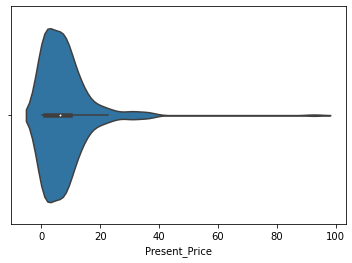

In [52]:
sns.violinplot(x=data_df["Present_Price"],inner="box")

Most of the cars have present prices between 5 lacs and 16 lacs.

<AxesSubplot:xlabel='Selling_Price'>

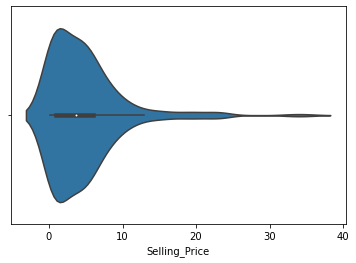

In [53]:
sns.violinplot(x=data_df["Selling_Price"],inner="box")

Most of the cars have selling prices between 3 lacs and 7 lacs.

<AxesSubplot:xlabel='Fuel_Type', ylabel='Present_Price'>

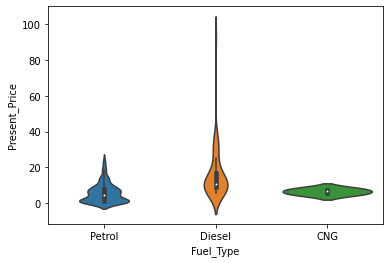

In [54]:
sns.violinplot(y='Present_Price',x='Fuel_Type',data=data_df,scale='area')

With this violinplot, it can be understood that diesel cars have more price whereas no of CNG cars are more in the database.

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

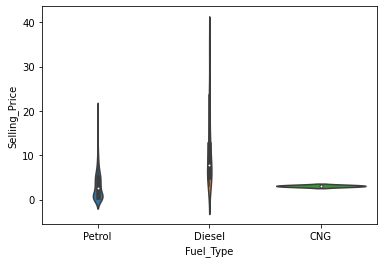

In [55]:
sns.violinplot(y='Selling_Price',x='Fuel_Type',data=data_df,scale='area')

With this violinplot, it can be understood that diesel cars have more selling price whereas no of CNG cars are more in the database.

<AxesSubplot:xlabel='Transmission', ylabel='Present_Price'>

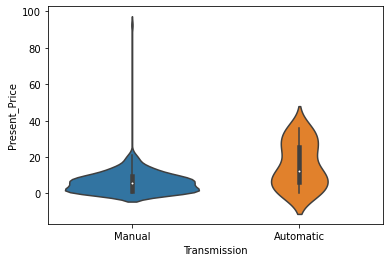

In [56]:
sns.violinplot(y='Present_Price',x='Transmission',data=data_df,scale='area')

From the above plot, it can be understood that present price of automatic cars lie between 10 and 30 lacs.

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

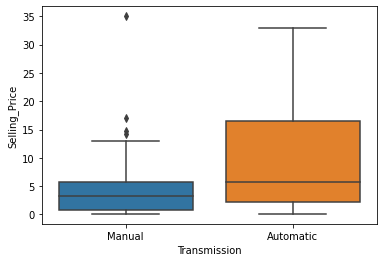

In [57]:
sns.boxplot(y='Selling_Price',x='Transmission',data=data_df)

In [58]:
# converting the categorical variables in the dataframe into binary or dummy variables
# use drop_first=True to drop the first dummy variable
data_df = pd.get_dummies(data_df, prefix_sep='_', drop_first=True)
data_df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [59]:
data_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


<AxesSubplot:>

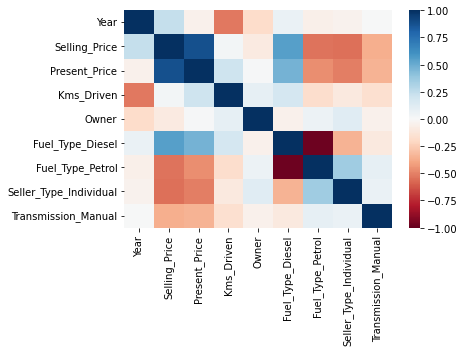

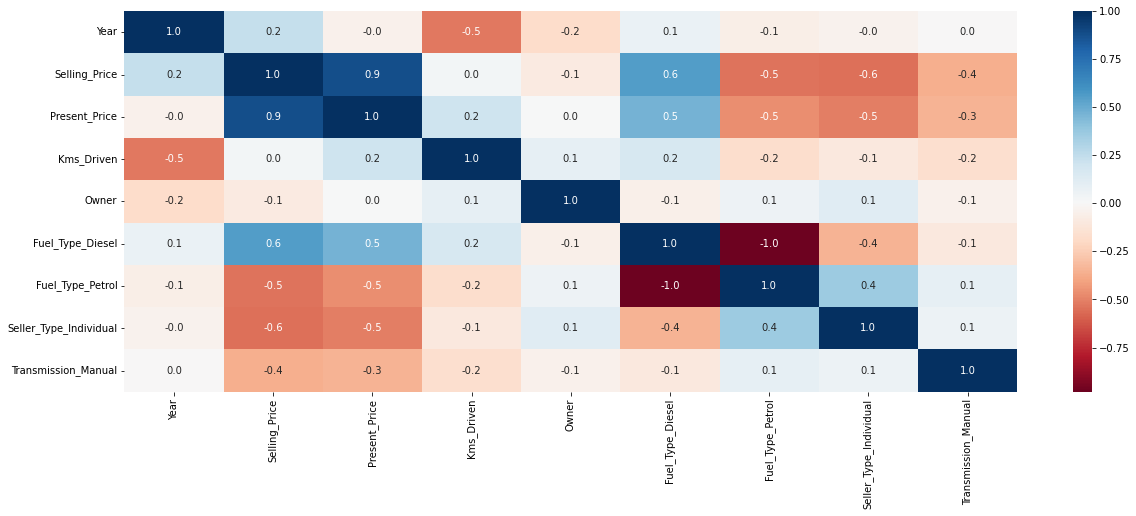

In [60]:
# drawing the correlation matrix to understand the correlation between the variables
corr = data_df.corr()
# Change the colormap to a divergent scale and fix the range of the colormap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu")

# Include information about values (example demonstrate how to control the size of
# the plot
fig, ax = plt.subplots()
fig.set_size_inches(20, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

In the above correlation matrix, we can see Selling_Price and Present_Price are highly correlated and we are predicting the Price so dropping Selling_Price.

In [61]:
data_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


In [69]:
#code for fitting a linear regression model to training data (West Roxbury)
from sklearn.linear_model import LinearRegression

In [81]:
# create list of predictors and outcome
excludeColumns = ('Selling_Price')
predictors = [s for s in data_df.columns if s not in excludeColumns]
outcome = 'Selling_Price'
   
# partition data
X = data_df[predictors]
y = data_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

Here, the predictors and outcome are set in the X variable is set and data is divided into training and validation 60% and 40%. 

In [82]:
model = LinearRegression()
model.fit(train_X, train_y)

train_pred = model.predict(train_X)
train_results = pd.DataFrame({
'Selling_Price': train_y,
'predicted': train_pred,
'residual': train_y - train_pred
})
train_results.head()

,Selling_Price,predicted,residual
48,5.80,5.126626,0.673374
243,6.25,5.574133,0.675867
161,0.45,0.595685,-0.145685
214,5.25,5.083039,0.166961
33,6.00,7.324207,-1.324207


After model is trained, these are the results of actual Selling_price and predicted Selling_Price for the training data by the model and the difference between them.

In [83]:
valid_pred = model.predict(valid_X)
valid_results = pd.DataFrame({
    'Selling_Price': valid_y,
    'predicted': valid_pred,
    'residual': valid_y - valid_pred
})
valid_results.head()

,Selling_Price,predicted,residual
285,7.40,8.147408,-0.747408
248,4.00,2.921712,1.078288
150,0.50,-0.547396,1.047396
217,3.15,4.139800,-0.989800
107,1.25,0.522586,0.727414


After model is trained, these are the results of actual Selling_price and predicted Selling_Price for the validation data by the model and the difference between them.

In [84]:
#code for computing model evaluation metrics

# import the utility function regressionSummary
from dmba import regressionSummary

# training set
regressionSummary(train_results.Selling_Price, train_results.predicted)

# validation set
regressionSummary(valid_results.Selling_Price, valid_results.predicted)


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1.8864
            Mean Absolute Error (MAE) : 1.2895
          Mean Percentage Error (MPE) : 34.9831
Mean Absolute Percentage Error (MAPE) : 124.6329

Regression statistics

                      Mean Error (ME) : -0.1630
       Root Mean Squared Error (RMSE) : 1.5990
            Mean Absolute Error (MAE) : 1.0593
          Mean Percentage Error (MPE) : 15.2867
Mean Absolute Percentage Error (MAPE) : 100.4086


In [85]:
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': 
  model.coef_}))

                Predictor  coefficient
0                    Year     0.407575
1           Present_Price     0.440648
2              Kms_Driven    -0.000005
3                   Owner     0.094489
4        Fuel_Type_Diesel     2.154235
5        Fuel_Type_Petrol     0.446509
6  Seller_Type_Individual    -1.103391
7     Transmission_Manual    -2.214447


In [88]:
new_data = pd.DataFrame({
    'Year': [2014, 2012, 2017],
    'Present_Price': [5.59, 4.20, 7.25],
    'Kms_Driven': [27000, 5200, 6900],
    'Owner': [0, 0, 0],
    'Fuel_Type_Diesel': [0, 1, 0],
    'Fuel_Type_Petrol': [1, 0, 1],
    'Seller_Type_Individual': [0, 0, 0],
    'Transmission_Manual': [1, 1, 1]
})
print(new_data)
print('Predictions: ', model.predict(new_data))

   Year  Present_Price  Kms_Driven  Owner  Fuel_Type_Diesel  Fuel_Type_Petrol  \
0  2014           5.59       27000      0                 0                 1   
1  2012           4.20        5200      0                 1                 0   
2  2017           7.25        6900      0                 0                 1   

   Seller_Type_Individual  Transmission_Manual  
0                       0                    1  
1                       0                    1  
2                       0                    1  
Predictions:  [3.77958324 4.16178979 5.82794966]


Here, with the help of this model I took a random dataset and used this model to predict the Selling_Price.